## Predicting Loan Eligibility

Web Implementation for Bank to Predict the eligible customers using Machine learning and AWS. 
Project Implemented for the course Laboratory of Advanced Programing.

In [68]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [69]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

## Loading the Data Set for Pre processing  ( Downloaded from kaggle)

In [70]:
df = pd.read_csv('dataset.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [71]:
df.shape

(614, 13)

In [72]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Data Cleaning

In [74]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Loan Status

In [75]:
df['Loan_Status'].value_counts()      # Y: Loan Approved, N: Loan Not Approved

Y    422
N    192
Name: Loan_Status, dtype: int64

Gender

In [76]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [77]:
# filling Gender with mode Gender value

df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [78]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

Married

In [79]:
df[pd.isnull(df['Married'])]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [80]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [81]:
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

In [82]:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

Dependents

In [83]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [84]:
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

In [85]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Self Employed

In [86]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [87]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [88]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

Loan Amount

<Axes: xlabel='LoanAmount', ylabel='Density'>

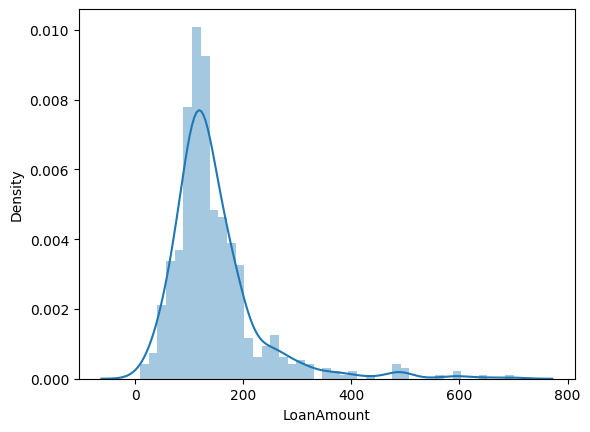

In [89]:
sns.distplot(df['LoanAmount'])

In [90]:
# as median value is lower than mean in case of right-skewed Loan Amount, so imputing it with median values

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

Loan Amount Term

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

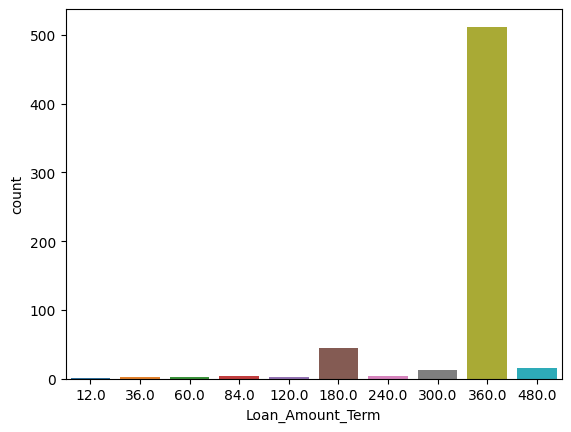

In [91]:
sns.countplot(x='Loan_Amount_Term', data=df)

In [92]:
# imputing Loan Amount Term with median values

df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

Credit History

<Axes: xlabel='Credit_History', ylabel='count'>

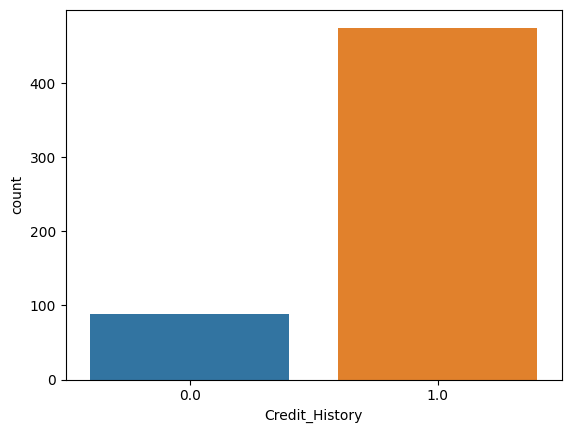

In [93]:
sns.countplot(x='Credit_History',data=df)

In [94]:
# imputing Credit_History with mode values

df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [95]:
df.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

## Exploratory Data Analysis

<Axes: xlabel='Dependents', ylabel='ApplicantIncome'>

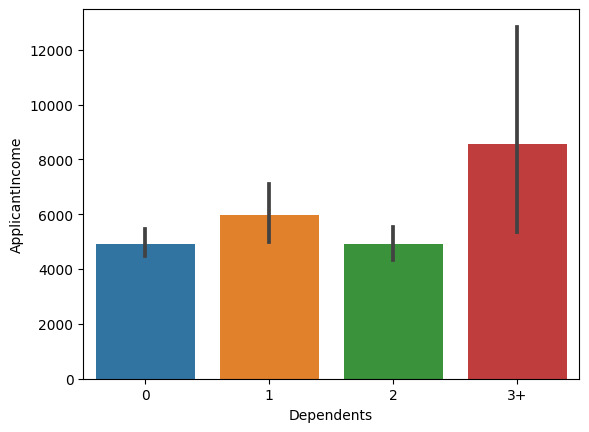

In [96]:
sns.barplot(x = 'Dependents', y = 'ApplicantIncome', data = df)

<Axes: xlabel='Loan_Status', ylabel='Credit_History'>

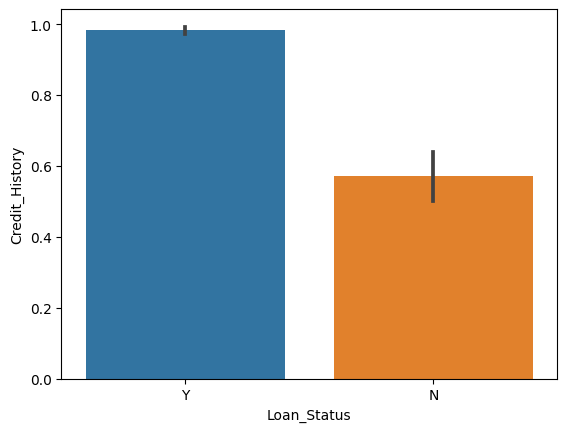

In [97]:
sns.barplot(x = 'Loan_Status', y = 'Credit_History', data = df)


<Axes: xlabel='Dependents', ylabel='count'>

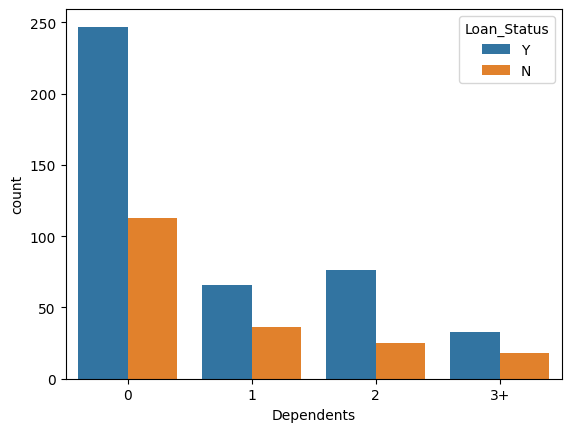

In [98]:
sns.countplot(x=df['Dependents'],hue=df['Loan_Status'])

When the number of dependents is 2 there is more chance of getting loan approval compared to when the number of dependents is 1, even though both has similar data count.

<Axes: xlabel='Property_Area', ylabel='ApplicantIncome'>

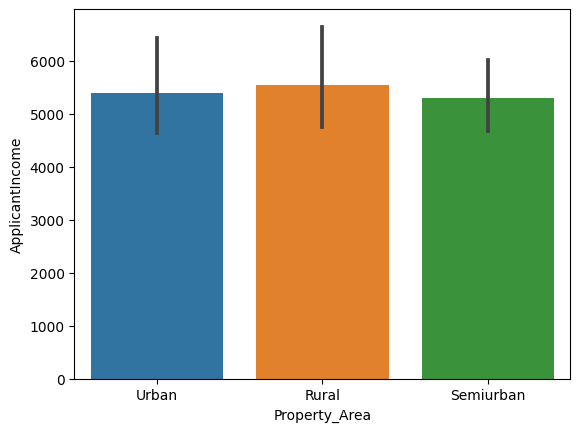

In [99]:
sns.barplot(x = 'Property_Area', y = 'ApplicantIncome', data = df)

<Axes: xlabel='Property_Area', ylabel='count'>

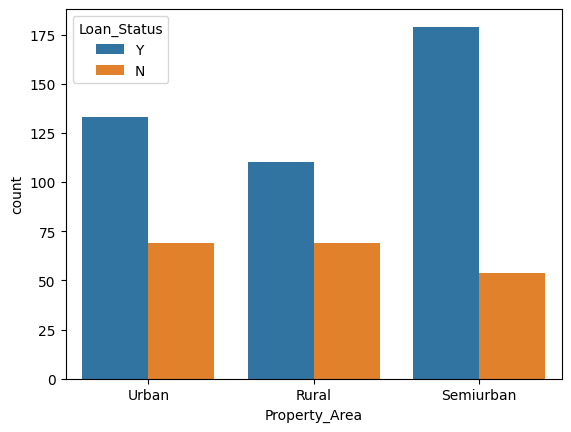

In [100]:
sns.countplot(x=df['Property_Area'],hue=df['Loan_Status'])

Most of the person is from Semiurban area, and highest Loan acceptance is from that area.

<Axes: xlabel='Married', ylabel='count'>

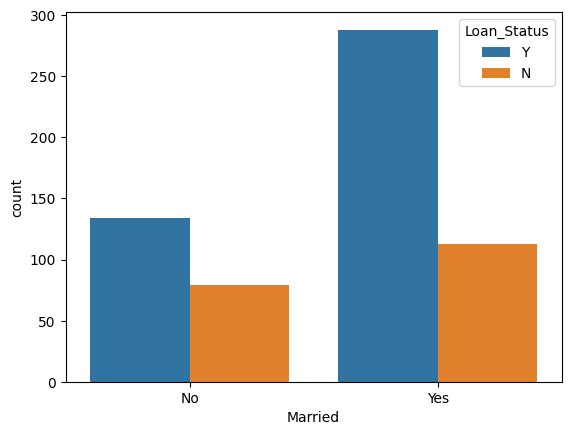

In [101]:
sns.countplot(x=df['Married'],hue=df['Loan_Status'])

More chances of getting loan approval for Married people.

<Axes: xlabel='Credit_History', ylabel='count'>

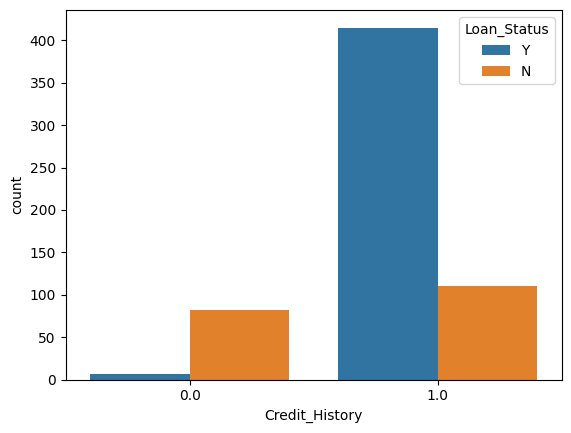

In [102]:
sns.countplot(x=df['Credit_History'],hue=df['Loan_Status'])

There is very rare chance of getting loan if the person has no credit history.

<Axes: xlabel='Education', ylabel='ApplicantIncome'>

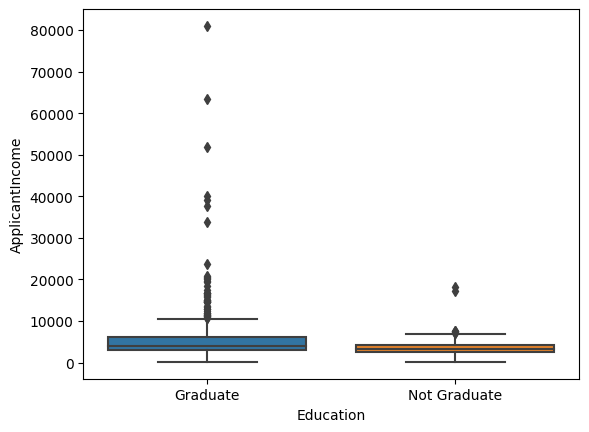

In [103]:
sns.boxplot(x = 'Education', y = 'ApplicantIncome', data = df)

Even though there is not much difference between the mean income of graduate and non-graduates, there are more number of Graduates with very high incomes compared to Not Graduates.

<Axes: xlabel='Property_Area', ylabel='LoanAmount'>

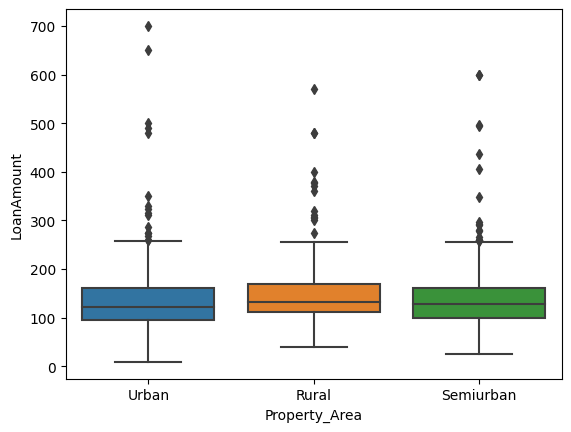

In [104]:
sns.boxplot(x = 'Property_Area', y = 'LoanAmount', data = df)

Median Loan Amount provided to Rural Area is slightly higher than Urban. But there are some people in Urban who has got higher loan amounts compared to Rural or Semi urban.

## Total Income

In [105]:
# combining both incomes to get total income

df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


<Axes: >

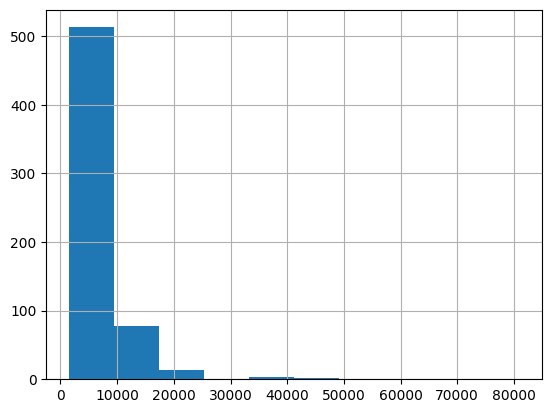

In [106]:
df['Total_Income'].hist()

## One Hot Encoding

In [107]:
dummies = pd.get_dummies(df['Gender'])
dummies.head()

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [108]:
merged = pd.concat([df,dummies], axis = 'columns')
merged.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Female,Male
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,0,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,0,1


In [109]:
df = merged.drop(['Gender','Female'], axis = 'columns')
df.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Male
0,LP001002,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,1
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,1
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,1
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,1
4,LP001008,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,1


## Label Encoding

In [110]:
cols = ['Married','Dependents','Education','Self_Employed','Property_Area']
le = LabelEncoder()
for i in cols:
    df[i] = le.fit_transform(df[i])
df.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Male
0,LP001002,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,Y,5849.0,1
1,LP001003,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N,6091.0,1
2,LP001005,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y,3000.0,1
3,LP001006,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y,4941.0,1
4,LP001008,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y,6000.0,1


In [111]:
loan_status = {'Loan_Status': {'Y': 0, 'N': 1}}
df = df.replace(loan_status)
df.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Male
0,LP001002,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,0,5849.0,1
1,LP001003,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,1,6091.0,1
2,LP001005,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,0,3000.0,1
3,LP001006,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,0,4941.0,1
4,LP001008,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,0,6000.0,1


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int64  
 12  Total_Income       614 non-null    float64
 13  Male               614 non-null    uint8  
dtypes: float64(5), int32(5), int64(2), object(1), uint8(1)
memory usage: 51.1+ KB


## Feature Selection and Scaling

In [113]:
# dropping columns which are not required for model building

df=df.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome'], axis = 1)
df.head()

,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Male
0,0,0,0,0,128.0,360.0,1.0,2,0,5849.0,1
1,1,1,0,0,128.0,360.0,1.0,0,1,6091.0,1
2,1,0,0,1,66.0,360.0,1.0,2,0,3000.0,1
3,1,0,1,0,120.0,360.0,1.0,2,0,4941.0,1
4,0,0,0,0,141.0,360.0,1.0,2,0,6000.0,1


In [114]:
X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

In [115]:
# scale only training data based on Min Max Scaler

scaler = MinMaxScaler(feature_range=(0,1))

X = scaler.fit_transform(X)
X = pd.DataFrame(X)

In [116]:
X.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.000000,0.0,0.0,0.172214,0.74359,1.0,1.0,0.055394,1.0
1,1.0,0.333333,0.0,0.0,0.172214,0.74359,1.0,0.0,0.058435,1.0
2,1.0,0.000000,0.0,1.0,0.082489,0.74359,1.0,1.0,0.019583,1.0
3,1.0,0.000000,1.0,0.0,0.160637,0.74359,1.0,1.0,0.043980,1.0
4,0.0,0.000000,0.0,0.0,0.191027,0.74359,1.0,1.0,0.057292,1.0


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20, stratify=y)

## K Nearest Neighbors

In [118]:
# finding accuracy for user given random k value

knnmodel = KNeighborsClassifier(n_neighbors=3) 
knnmodel.fit(X_train, y_train)
y_preds = knnmodel.predict(X_test)
gen_score = accuracy_score(y_test, y_preds)
print("Accuracy is", round(gen_score*100, 2)) # general accuracy
cval_score = np.mean(cross_val_score(knnmodel, X, y, cv=5)) # accuracy using 5 fold cross validation
print("Mean accuracy after Cross validation is", round(cval_score*100,2))

Accuracy is 73.17
Mean accuracy after Cross validation is 75.09


In [119]:
# finding out optimised value for k

rmse_val_list = []

iter_len=len(X_test)
iter_size=round(sqrt(iter_len))

for k in range(iter_size):
    k = k+1
    knnmodel = KNeighborsClassifier(n_neighbors=k)
    knnmodel.fit(X_train, y_train)
    y_preds = knnmodel.predict(X_test)
    error = sqrt(mean_squared_error(y_test, y_preds))
    rmse_val_list.append(error) #in empty list appending error values

print("The minimum error we get is :", min(rmse_val_list))
print("The correponding k value is :", 1+rmse_val_list.index(min(rmse_val_list))) #basic index in list is 0, so add 1

k1 = 1+rmse_val_list.index(min(rmse_val_list))

The minimum error we get is : 0.4324255657551935
The correponding k value is : 6


In [120]:
# getting accuracy with the optimised k value

knnmodel = KNeighborsClassifier(n_neighbors=k1) # passing random neighbors value
knnmodel.fit(X_train, y_train)
y_pred = knnmodel.predict(X_test)
gen_score = accuracy_score(y_test, y_pred)
print("Accuracy is", round(gen_score*100,2)) # general accuracy
cval_score = np.mean(cross_val_score(knnmodel, X, y, cv=5)) # accuracy using 5 fold cross validation
print("Mean accuracy after Cross validation is", round(cval_score*100,2))

Accuracy is 81.3
Mean accuracy after Cross validation is 80.13


## Decision Tree

In [121]:
# without Hyperparameter Tuning

dtmodel = DecisionTreeClassifier(random_state=15)
dtmodel.fit(X_train, y_train)
y_pred = dtmodel.predict(X_test)
accuracy_score(y_pred, y_test)*100

69.91869918699187

In [122]:
# with Hyperparameter Tuning

params = {'criterion':['gini','entropy'],'max_leaf_nodes':list(range(2,10)),'min_samples_split':[2,3,4,5], 'max_depth':list(range(3,10))}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=20), params, cv=5)
grid_search_cv.fit(X_train, y_train)
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=2, random_state=20)

In [123]:
dtmodel = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=2,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, 
                        random_state=20, splitter='best')

dtmodel.fit(X_train, y_train)
y_pred = dtmodel.predict(X_test)
accuracy_score(y_pred, y_test)*100

81.30081300813008

## Logistic Regression

In [124]:
lrmodel = LogisticRegression()
lrmodel.fit(X_train, y_train)
y_pred = lrmodel.predict(X_test)
gen_score = accuracy_score(y_test, y_pred)
print("Accuracy is", round(gen_score*100,2)) # general accuracy
cval_score = np.mean(cross_val_score(lrmodel, X, y, cv=5)) # accuracy using 5 fold cross validation
print("Mean accuracy after Cross validation is", round(cval_score*100,2))

Accuracy is 81.3
Mean accuracy after Cross validation is 80.95


## Gradient Boosting

In [125]:
gbmodel = GradientBoostingClassifier()
gbmodel.fit(X_train, y_train)

y_pred = gbmodel.predict(X_test)
accuracy_score(y_pred, y_test)*100

78.04878048780488

In [126]:
gbmodel.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [127]:
# with Hyperparameter Tuning

params = {'max_leaf_nodes':[4,5,None],'min_samples_split':[2,3,4], 'max_depth':list(range(3,6))}

grid_search_cv = GridSearchCV(GradientBoostingClassifier(random_state=20), params, cv=5)
grid_search_cv.fit(X_train, y_train)
grid_search_cv.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'friedman_mse',
 'estimator__init': None,
 'estimator__learning_rate': 0.1,
 'estimator__loss': 'log_loss',
 'estimator__max_depth': 3,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_iter_no_change': None,
 'estimator__random_state': 20,
 'estimator__subsample': 1.0,
 'estimator__tol': 0.0001,
 'estimator__validation_fraction': 0.1,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': GradientBoostingClassifier(random_state=20),
 'n_jobs': None,
 'param_grid': {'max_leaf_nodes': [4, 5, None],
  'min_samples_split': [2, 3, 4],
  'max_depth': [3, 4, 5]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0

In [128]:
gbmodel = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, 
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None,
                            random_state=20, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False)

gbmodel.fit(X_train,y_train)
y_pred = gbmodel.predict(X_test)
accuracy_score(y_pred, y_test)*100

78.04878048780488

## Classification Report

In [129]:
from IPython.display import HTML, display 
import tabulate
print('CONFUSION MATRIX in SkLearn:')
print('0: Majority/Negative/Loan Approved, 1: Minority/Positive/Loan Not Approved')
print()
table = [['','Predicted 0','Predicted 1'],
         ['Actual 0','TN','FP'],
         ['Actual 1','FN','TP']]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

CONFUSION MATRIX in SkLearn:
0: Majority/Negative/Loan Approved, 1: Minority/Positive/Loan Not Approved



,Predicted 0,Predicted 1
Actual 0,TN,FP
Actual 1,FN,TP


Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

F1 Score = 2 (Recall x Precision) / (Recall + Precision)

Main objective is such that we should not approve loan for potential defaulters. So FN is vital here. We need to reduce it. So metric could be Recall/F1 Score.

In [130]:
y_pred = knnmodel.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[83  2]
 [21 17]]
              precision    recall  f1-score   support

           0       0.80      0.98      0.88        85
           1       0.89      0.45      0.60        38

    accuracy                           0.81       123
   macro avg       0.85      0.71      0.74       123
weighted avg       0.83      0.81      0.79       123



In [131]:
y_pred = dtmodel.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[83  2]
 [21 17]]
              precision    recall  f1-score   support

           0       0.80      0.98      0.88        85
           1       0.89      0.45      0.60        38

    accuracy                           0.81       123
   macro avg       0.85      0.71      0.74       123
weighted avg       0.83      0.81      0.79       123



In [132]:
y_pred = lrmodel.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[83  2]
 [21 17]]
              precision    recall  f1-score   support

           0       0.80      0.98      0.88        85
           1       0.89      0.45      0.60        38

    accuracy                           0.81       123
   macro avg       0.85      0.71      0.74       123
weighted avg       0.83      0.81      0.79       123



In [133]:
gbmodel.fit(X_train, y_train)
y_pred = gbmodel.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[76  9]
 [18 20]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        85
           1       0.69      0.53      0.60        38

    accuracy                           0.78       123
   macro avg       0.75      0.71      0.72       123
weighted avg       0.77      0.78      0.77       123



Gradient Boosting model gives us the best result in terms of Recall and F1 Score.

In [ ]:
compare_models(sort = 'F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7671,0.7177,0.4709,0.6851,0.5471,0.4024,0.4199,0.037
gbc,Gradient Boosting Classifier,0.7694,0.7305,0.4484,0.7117,0.5340,0.3979,0.4230,0.088
dt,Decision Tree Classifier,0.6995,0.6598,0.5533,0.5305,0.5338,0.3154,0.3202,0.015
ridge,Ridge Classifier,0.7974,0.0000,0.3874,0.9233,0.5229,0.4305,0.5013,0.014
lda,Linear Discriminant Analysis,0.7974,0.7299,0.3874,0.9233,0.5229,0.4305,0.5013,0.016
et,Extra Trees Classifier,0.7460,0.7019,0.4533,0.6247,0.5166,0.3536,0.3655,0.459
nb,Naive Bayes,0.7834,0.6850,0.3951,0.8082,0.5123,0.4036,0.4504,0.015
ada,Ada Boost Classifier,0.7556,0.7146,0.4401,0.6434,0.5069,0.3611,0.3769,0.096
rf,Random Forest Classifier,0.7601,0.7264,0.4022,0.6952,0.4991,0.3614,0.3878,0.461
lr,Logistic Regression,0.7648,0.7017,0.3291,0.7022,0.4303,0.3337,0.3753,0.034


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=6198, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)